### Demo from https://machinelearningmastery.com/implementing-gradient-descent-in-pytorch/
### Import library

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

### Generate simulation data

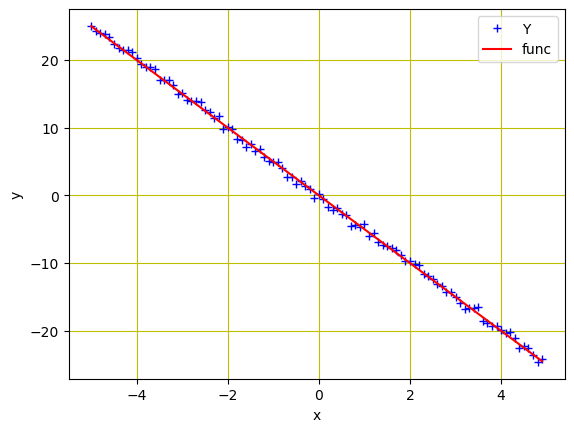

In [2]:
X = torch.arange(-5, 5, 0.1).view(-1, 1)
func = -5 * X

# Adding Gaussian noise to the function f(X) and saving it in Y
Y = func + 0.4 * torch.randn(X.size())

# Plot and visualizing the data points in blue
plt.plot(X.numpy(), Y.numpy(), 'b+', label='Y')
plt.plot(X.numpy(), func.numpy(), 'r', label='func')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid('True', color='y')
plt.show()

### Define model and loss function

In [3]:
# defining the function for forward pass for prediction
def forward(x):
    return w * x + b
 
# evaluating data points with Mean Square Error (MSE)
def criterion(y_pred, y):
    return torch.mean((y_pred - y) ** 2)

### Training model with Gradient Descent

In [4]:
# Initialize
w = torch.tensor(0.0, requires_grad=True)
b = torch.tensor(0.0, requires_grad=True)

step_size = 0.1
loss_BGD = []
n_iter = 20
for i in range (n_iter):
    # making predictions with forward pass
    Y_pred = forward(X)
    
    # calculating the loss between original and predicted data points
    loss = criterion(Y_pred, Y)
    loss_BGD.append(loss.item())
    
    # backward pass for computing the gradients of the loss w.r.t to learnable parameters
    loss.backward()
    
    # updateing the parameters after each iteration
    w.data = w.data - step_size * w.grad.data
    b.data = b.data - step_size * b.grad.data
    
    # zeroing gradients after each iteration
    w.grad.data.zero_()
    b.grad.data.zero_()
    
    # priting the values for understanding
    print('{:d}/{:d} \t{:.4f} \t{:.4f} \t{:.4f}'.format(i+1, n_iter, loss.item(), w.item(), b.item()))

1/20 	208.9171 	-8.3421 	0.0490
2/20 	93.0685 	-2.7774 	0.0048
3/20 	41.5180 	-6.4895 	0.0250
4/20 	18.5790 	-4.0133 	0.0041
5/20 	8.3716 	-5.6651 	0.0121
6/20 	3.8294 	-4.5633 	0.0021
7/20 	1.8083 	-5.2983 	0.0050
8/20 	0.9089 	-4.8080 	0.0000
9/20 	0.5086 	-5.1351 	0.0009
10/20 	0.3305 	-4.9170 	-0.0016
11/20 	0.2513 	-5.0625 	-0.0015
12/20 	0.2160 	-4.9654 	-0.0028
13/20 	0.2003 	-5.0302 	-0.0029
14/20 	0.1933 	-4.9870 	-0.0037
15/20 	0.1902 	-5.0158 	-0.0038
16/20 	0.1889 	-4.9966 	-0.0042
17/20 	0.1882 	-5.0094 	-0.0043
18/20 	0.1880 	-5.0009 	-0.0046
19/20 	0.1878 	-5.0066 	-0.0047
20/20 	0.1878 	-5.0028 	-0.0048


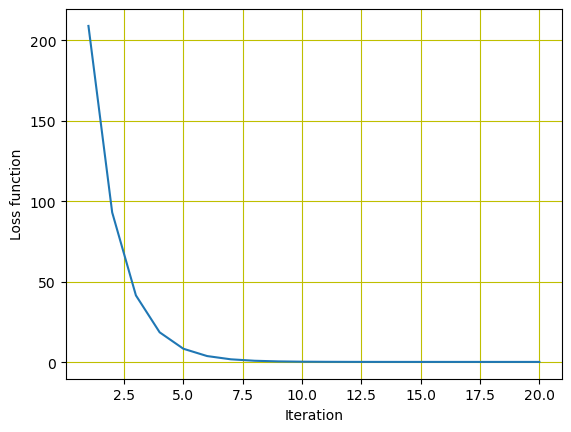

In [5]:
plt.plot(np.arange(1, n_iter+1), loss_BGD)
plt.grid('True', color='y')
plt.xlabel("Iteration")
plt.ylabel("Loss function")
plt.show()